In [141]:

# write it in a new format
#  iio.imwrite("g4g.jpg", img)

C:\Users\popo\AppData\Local\Temp\ipykernel_14804\1835449410.py:4: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.



AttributeError: 'Array' object has no attribute 'show'

importing

In [56]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

loading data set


In [57]:
road_accident_train = pd.read_csv(r'C:\Users\popo\mini_project\data\merged-csv-files.csv')
road_accident_train.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually
0,Alabama,18.8,39,30,80,64914
1,Alaska,18.1,41,25,94,4593
2,Arizona,18.6,35,28,96,59575
3,Arkansas,22.4,18,26,95,32953
4,California,12.0,35,28,89,320784


In [58]:
print(road_accident_train.describe(include=["O"]))

          state
count        51
unique       51
top     Alabama
freq          1


In [59]:
print(road_accident_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   drvr_fatl_col_bmiles    51 non-null     float64
 2   perc_fatl_speed         51 non-null     int64  
 3   perc_fatl_alcohol       51 non-null     int64  
 4   perc_fatl_1st_time      51 non-null     int64  
 5   million_miles_annually  51 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 2.5+ KB
None


In [64]:
check_nan = road_accident_train['perc_fatl_speed'].isnull().values.any()
 
# printing the result
print(check_nan)
# print( road_accident_train['perc_fatl_speed'])


False


In [61]:
road_accident_train.shape

(51, 6)

In [62]:
road_accident_train.dtypes

state                      object
drvr_fatl_col_bmiles      float64
perc_fatl_speed             int64
perc_fatl_alcohol           int64
perc_fatl_1st_time          int64
million_miles_annually      int64
dtype: object

In [97]:
# Data type conversions
road_accident_train['state'] = road_accident_train['state'].astype('string')

# Show new data types
road_accident_train.dtypes

state                      string
drvr_fatl_col_bmiles      float64
perc_fatl_speed             int64
perc_fatl_alcohol           int64
perc_fatl_1st_time          int64
million_miles_annually      int64
dtype: object

array([[<AxesSubplot: title={'center': 'drvr_fatl_col_bmiles'}>,
        <AxesSubplot: title={'center': 'perc_fatl_speed'}>],
       [<AxesSubplot: title={'center': 'perc_fatl_alcohol'}>,
        <AxesSubplot: title={'center': 'perc_fatl_1st_time'}>],
       [<AxesSubplot: title={'center': 'million_miles_annually'}>,
        <AxesSubplot: >]], dtype=object)

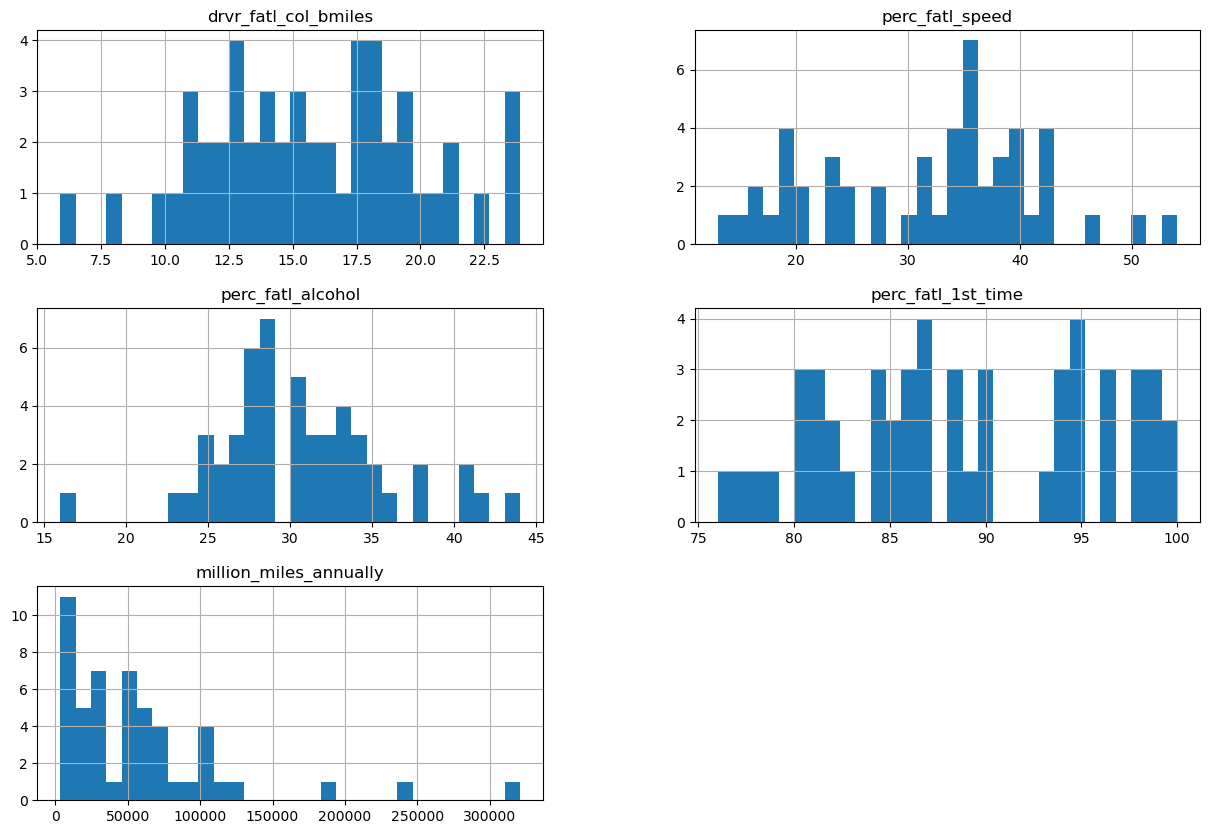

In [66]:
road_accident_train.hist(bins=30, figsize=(15, 10))


In [67]:
import plotly.express as px
fig = px.scatter_matrix(road_accident_train,
    dimensions=["drvr_fatl_col_bmiles", "perc_fatl_speed", "perc_fatl_alcohol", "perc_fatl_1st_time"],
    color="state")
fig.update_layout(
    title='Road_Accident_Mortality',
    dragmode='select',
    width=800,
    height=800,
    hovermode='closest',
)
fig.show()


c:\Users\popo\anaconda3\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [68]:
pearsoncorr = road_accident_train.corr(method='pearson')
pearsoncorr

C:\Users\popo\AppData\Local\Temp\ipykernel_14804\3734834120.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942,-0.077133
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066,-0.043199
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455,-0.034561
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000,-0.128928
million_miles_annually,-0.077133,-0.043199,-0.034561,-0.128928,1.000000


<AxesSubplot: >

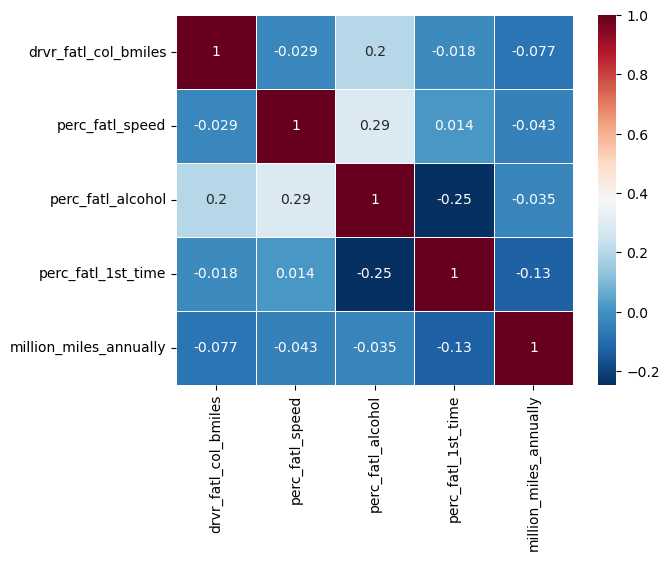

In [ ]:
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

# Multi_Varient_Regression

In [69]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
np.random.seed(19680801)

In [70]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

In [71]:
road_accident_train.isnull().values.any()

False

In [82]:
#  road_accident_train = pd.read_csv(r'C:\Users\popo\mini_project\data\merged-csv-files.csv')
x = road_accident_train[["perc_fatl_speed","perc_fatl_alcohol"]]
y = road_accident_train['drvr_fatl_col_bmiles']
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 11.487059143850544
Coefficients: 
 [-0.04015906  0.1817491 ]
                             OLS Regression Results                             
Dep. Variable:     drvr_fatl_col_bmiles   R-squared:                       0.048
Model:                              OLS   Adj. R-squared:                  0.008
Method:                   Least Squares   F-statistic:                     1.206
Date:                  Sat, 18 Feb 2023   Prob (F-statistic):              0.308
Time:                          18:02:40   Log-Likelihood:                -142.84
No. Observations:                    51   AIC:                             291.7
Df Residuals:                        48   BIC:                             297.5
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

# PCA 

In [88]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# X, y = load_wine(return_X_y=True, as_frame=True)
# scaler = StandardScaler().set_output(transform="pandas")

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.30, random_state=42
# )
scaled_X_train = StandardScaler().fit_transform(x)

c:\Users\popo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\popo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

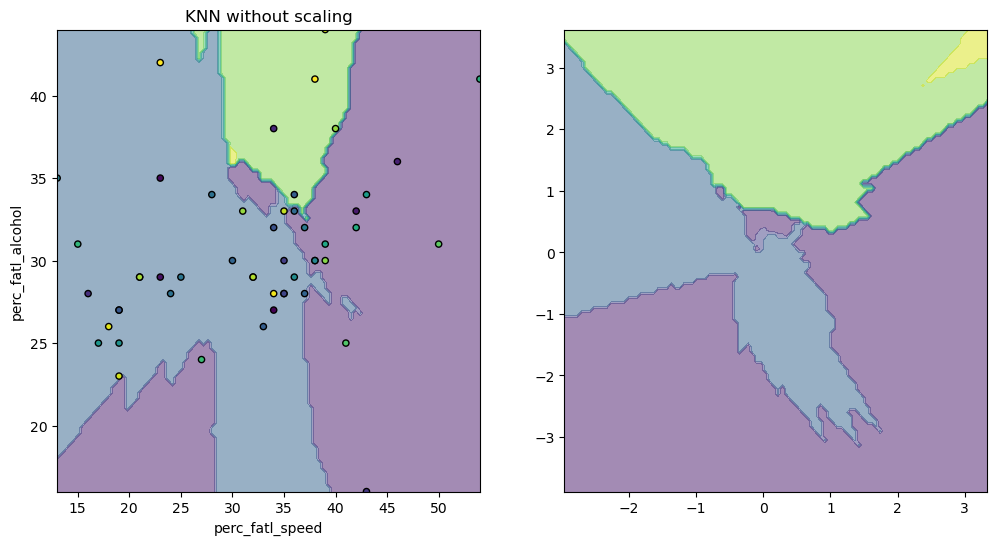

In [98]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values



X_plot = road_accident_train[["perc_fatl_speed","perc_fatl_alcohol"]]
X_plot_scaled = StandardScaler().fit_transform(X_plot)
clf = KNeighborsClassifier(n_neighbors=20)


def fit_and_plot_model(X_plot, y, clf, ax):
    clf.fit(X_plot, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_plot,
        response_method="predict",
        alpha=0.5,
        ax=ax,
    )
    disp.ax_.scatter(X_plot["perc_fatl_speed"], X_plot["perc_fatl_alcohol"], c=y, s=20, edgecolor="k")
    disp.ax_.set_xlim((X_plot["perc_fatl_speed"].min(), X_plot["perc_fatl_speed"].max()))
    disp.ax_.set_ylim((X_plot["perc_fatl_alcohol"].min(), X_plot["perc_fatl_alcohol"].max()))
    return disp.ax_


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)
fit_and_plot_model(X_plot,y_transformed, clf, ax1)
ax1.set_title("KNN without scaling")

fit_and_plot_model(X_plot_scaled, y_transformed, clf, ax2)
ax2.set_xlabel("scaled proline")
ax2.set_ylabel("scaled hue")
_ = ax2.set_title("KNN with scaling")

In [110]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x=road_accident_train[["drvr_fatl_col_bmiles", "perc_fatl_speed", "perc_fatl_alcohol", "perc_fatl_1st_time"]]
X_train, X_test, y_train, y_test = train_test_split(
   x, y, test_size=0.30, random_state=42
)
scaled_X_train = StandardScaler().fit_transform(X_train)

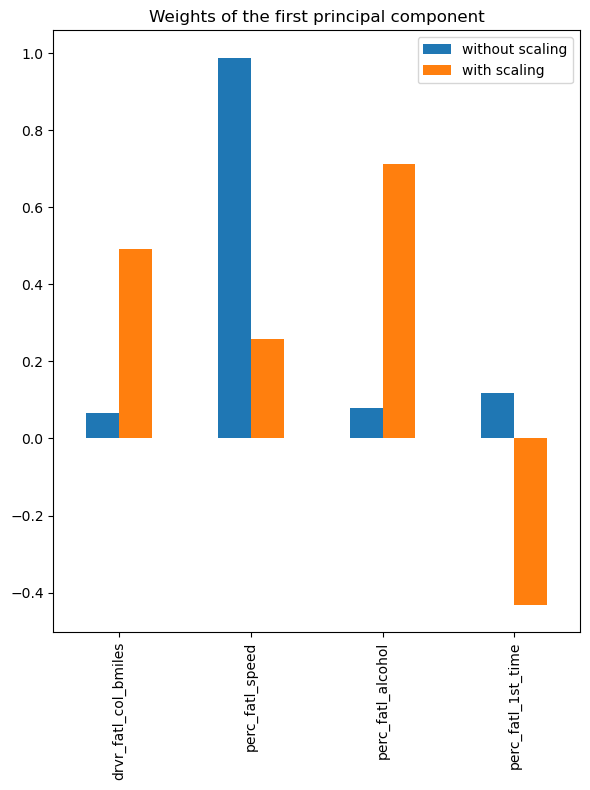

In [111]:
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X_train)
scaled_pca = PCA(n_components=2).fit(scaled_X_train)
X_train_transformed = pca.transform(X_train)
X_train_std_transformed = scaled_pca.transform(scaled_X_train)

first_pca_component = pd.DataFrame(
    pca.components_[0], index= X_train.columns, columns=["without scaling"]
)
first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component", figsize=(6, 8)
)

_ = plt.tight_layout()

ValueError: ('Lengths must match to compare', (35,), (2,))

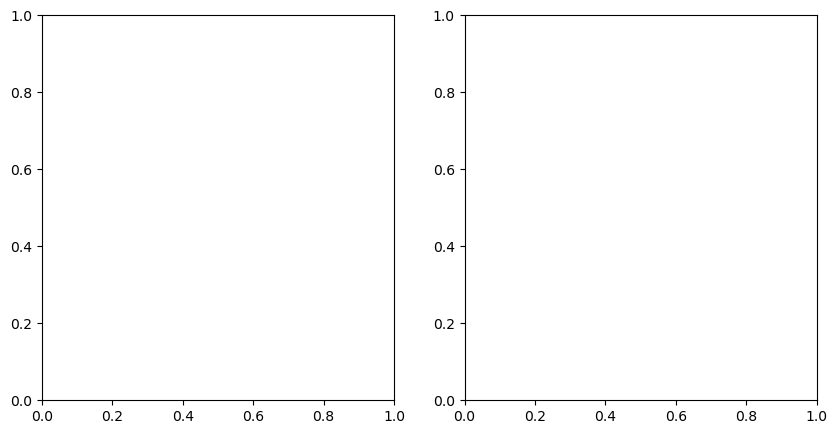

In [119]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
target_classes = [["perc_fatl_alcohol", "perc_fatl_1st_time"]]
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_transformed[y_train == target_class, 0],
        y=X_train_transformed[y_train == target_class, 1],
        color=color,
        # label= "perc_fatl_alcohol",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        # label="perc_fatl_1st_time",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Unscaled training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()

_ = plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


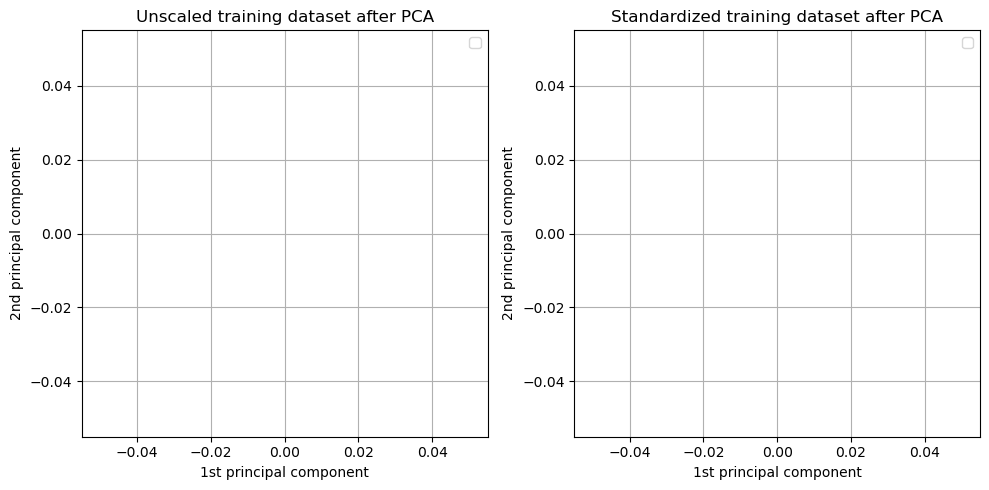

In [115]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
# speeding, alcohol influence, and first-time accidents.
# "perc_fatl_speed", "perc_fatl_alcohol", "perc_fatl_1st_time"
target_classes = [["perc_fatl_speed", "perc_fatl_alcohol", "perc_fatl_1st_time"]]
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_transformed[y_train == "perc_fatl_speed", 0],
        y=X_train_transformed[y_train == "perc_fatl_1st_time", 1],
        color=color,
        # label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=X_train_std_transformed[y_train =="perc_fatl_speed", 0],
        y=X_train_std_transformed[y_train == "perc_fatl_1st_time", 1],
        color=color,
        # label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Unscaled training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()

_ = plt.tight_layout()

In [100]:
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(road_accident_train)
scaled_pca = PCA(n_components=2).fit(scaled_X_train)
X_train_transformed = pca.transform(X_train)
X_train_std_transformed = scaled_pca.transform(scaled_X_train)

first_pca_component = pd.DataFrame(
    pca.components_[0], index=road_accident_train.columns, columns=["without scaling"]
)
first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component", figsize=(6, 8)
)

_ = plt.tight_layout()

ValueError: could not convert string to float: 'Alabama'

# Kmeans

In [128]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
# data = load_digits().data
pca = PCA(2)
 
#Transform the data
#  = pca.fit_transform(data)
 
road_accident_train.shape

(51, 6)

In [130]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(road_accident_train[["perc_fatl_speed", "perc_fatl_alcohol", "perc_fatl_1st_time"]])
 
print(label)

c:\Users\popo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



[4 3 3 6 0 3 2 3 3 6 6 8 3 3 6 1 0 9 3 4 3 5 9 1 6 4 2 1 3 4 9 6 0 4 5 5 3
 0 8 2 2 0 9 2 7 3 1 4 0 4 4]


In [137]:
#filter rows of original data
filtered_label2 = road_accident_train[["perc_fatl_speed", "perc_fatl_alcohol", "perc_fatl_1st_time"]][label == 2]
 
filtered_label8 = road_accident_train[["perc_fatl_speed", "perc_fatl_alcohol", "perc_fatl_1st_time"]][label == 8]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

In [121]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(road_accident_train[["perc_fatl_speed", "perc_fatl_alcohol", "perc_fatl_1st_time"]])

c:\Users\popo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [124]:
#Getting unique labels
def to_bool(label):
    return 1 if label == 'True' else 0
u_labels = np.unique(to_bool(label))
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(road_accident_train[label == i , 0] , road_accident_train[label == i , 1] , label = i)
plt.legend()
plt.show()

C:\Users\popo\AppData\Local\Temp\ipykernel_14804\951599552.py:3: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



InvalidIndexError: (array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False]), 0)

In [126]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(road_accident_train[label == i , 0] , road_accident_train[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

InvalidIndexError: (array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False]), 0)